<a href="https://colab.research.google.com/github/nheumann/nlp-sentiment-analysis/blob/main/dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install datasets transformers

     |████████████████████████████████| 2.5MB 7.6MB/s 
     |████████████████████████████████| 3.3MB 32.5MB/s 
     |████████████████████████████████| 901kB 26.1MB/s 
ERROR: transformers 4.7.0 has requirement huggingface-hub==0.0.8, but you'll have huggingface-hub 0.0.10 which is incompatible.


In [ ]:
from datasets import load_dataset
import pandas as pd
from transformers import AutoTokenizer

In [ ]:
data = load_dataset("go_emotions", "simplified")

train_raw = data['train']
val_raw = data['validation']
test_raw = data['validation']

train_df = train_raw.to_pandas()
val_df = val_raw.to_pandas()
test_df = test_raw.to_pandas()

Reusing dataset go_emotions (/root/.cache/huggingface/datasets/go_emotions/simplified/0.0.0/2637cfdd4e64d30249c3ed2150fa2b9d279766bfcd6a809b9f085c61a90d776d)


In [ ]:
data_raw = load_dataset("go_emotions", "raw")

Dataset go_emotions downloaded and prepared to /root/.cache/huggingface/datasets/go_emotions/raw/0.0.0/2637cfdd4e64d30249c3ed2150fa2b9d279766bfcd6a809b9f085c61a90d776d. Subsequent calls will reuse this data.


In [ ]:
all_data = pd.concat([train_df, val_df, test_df])
print(len(all_data))

68.36946666175224


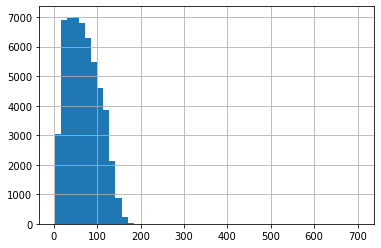

In [ ]:
# average comment character length
comment_avg = all_data['text'].apply(len).mean()
all_data['text_length'] = all_data['text'].apply(len)
comment_distribution = all_data['text_length'].hist(bins=50)
print(comment_avg)

68.36946666175224


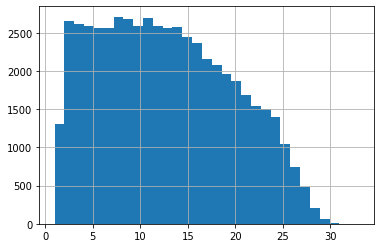

In [ ]:
# average comment word length
comment_avg = all_data['text'].apply(len).mean()
all_data['text_length'] = all_data['text'].str.split().apply(len)
comment_distribution = all_data['text_length'].hist(bins=31)
print(comment_avg)

In [ ]:
model_describ = "distilbert-base-cased"
tokenizer = AutoTokenizer.from_pretrained(model_describ)
#train = train.map(lambda e: tokenizer(e['text'], truncation=True, padding='max_length'), batched=True)
# we can still pass max length here
train_encodings = tokenizer(train_df['text'].values.tolist(), padding=True, truncation=True)
val_encodings = tokenizer(val_df['text'].values.tolist(), padding=True, truncation=True)
test_encodings = tokenizer(test_df['text'].values.tolist(), padding=True, truncation=True)

Encoding(num_tokens=57, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])
Encoding(num_tokens=57, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])
Encoding(num_tokens=57, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])
Encoding(num_tokens=57, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])
Encoding(num_tokens=57, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])
Encoding(num_tokens=57, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])
Encoding(num_tokens=57, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])
Encoding(num_tokens=57, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])
Encoding(num_tokens=57, attributes=[ids, type_id

In [ ]:
for text in val_encodings[:10]:
  print(text.tokens)

['[CLS]', 'Is', 'this', 'in', 'New', 'Orleans', '?', '?', 'I', 'really', 'feel', 'like', 'this', 'is', 'New', 'Orleans', '.', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
['[CLS]', 'You', 'know', 'the', 'answer', 'man', ',', 'you', 'are', 'programmed', 'to', 'capture', 'those', 'codes', 'they', 'send', 'you', ',', 'don', '’', 't', 'avoid', 'them', '!', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
['[CLS]', 'I', "'", 've', 'never'

In [ ]:
uniques, counts = np.unique(train_encoding.tokens, return_counts=True)
print(uniques[:10])
print(counts[:10])

AttributeError: ignored

In [ ]:
# vocabulary size